### Importing the data

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time
import os

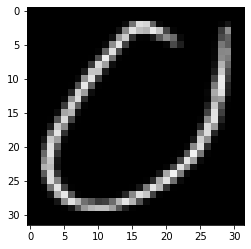

In [ ]:
img = cv.imread('/content/drive/My Drive/Colab Notebooks/digits/digit_0/4558.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

In [ ]:
img.shape

(32, 32, 3)

In [ ]:
# Resize the image
img_height = 30
img_width = 30
img = cv.resize(img, (img_height, img_width))

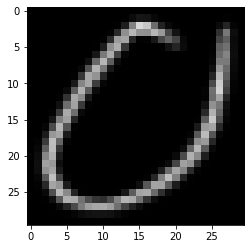

In [ ]:
plt.imshow(img)

In [ ]:
len(img.flatten())

2700

**Importing the whole data**

In [ ]:
# Importing 0 digit images
folder = '/content/drive/My Drive/Colab Notebooks/digits/'
images_arr = []
target = []

os.listdir(folder)

['digit_5',
 'digit_2',
 'digit_7',
 'digit_3',
 'digit_0',
 'digit_4',
 'digit_8',
 'digit_9',
 'digit_1',
 'digit_6']

In [ ]:
# Setting up the directories to be accessed

for i in range(10):
  print(f'digit_{i}')

print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/digits/' + f'digit_2')))

digit_0
digit_1
digit_2
digit_3
digit_4
digit_5
digit_6
digit_7
digit_8
digit_9
90


In [ ]:
for i in range(10):
  folder = '/content/drive/My Drive/Colab Notebooks/digits/' + f'digit_{i}'
  for filename in os.listdir(folder):
      img = cv.imread(os.path.join(folder,filename))
      img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
      if img is not None:
          images_arr.append(img)
          target.append(i)

In [ ]:
img_arr = np.array(images_arr)

**Flattening**

In [ ]:
# Flattening the images 
img_flattened = []
for i in range(len(img_arr)):
  img_height = 16
  img_width = 16
  img = cv.resize(img_arr[i], (img_height, img_width))
  img_flattened.append(img.flatten())

In [ ]:
img_flattened = np.array(img_flattened)

In [ ]:
img_flattened.shape

(1409, 768)

In [ ]:
# Converting the target feature
target = np.array(target)

In [ ]:
target.shape

(1409,)

In [ ]:
# Manually importing target feature
'''
import os
 
t = []

for i in range(10):
  l = len(os.listdir('/content/drive/My Drive/Colab Notebooks/digits/' + f'digit_{i}'))
  for j in range(l):
    t.append(i)

Run only if needed
'''

"\nimport os\n \nt = []\n\nfor i in range(10):\n  l = len(os.listdir('/content/drive/My Drive/Colab Notebooks/digits/' + f'digit_{i}'))\n  for j in range(l):\n    t.append(i)\n\nRun only if needed\n"

**Preprocessing**

In [ ]:
target_df = pd.DataFrame(target)
target_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
1404,9
1405,9
1406,9
1407,9


In [ ]:
# One Hot Encoding the data (target features)
target_df = pd.concat([target_df, pd.get_dummies(target_df[0], prefix='t')],axis=1)

# Now drop the original column
target_df.drop([0],axis=1, inplace=True)

In [ ]:
target_df

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1404,0,0,0,0,0,0,0,0,0,1
1405,0,0,0,0,0,0,0,0,0,1
1406,0,0,0,0,0,0,0,0,0,1
1407,0,0,0,0,0,0,0,0,0,1


### X and Y

In [ ]:
X = img_flattened
y = np.array(target_df)

In [ ]:
# Checking the columns
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.DataFrame(y)

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1404,0,0,0,0,0,0,0,0,0,1
1405,0,0,0,0,0,0,0,0,0,1
1406,0,0,0,0,0,0,0,0,0,1
1407,0,0,0,0,0,0,0,0,0,1


**Normalizing the values of X**

In [ ]:
# Normalizing X
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [ ]:
# Checking the values
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
np.max(X)

1.0

In [ ]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(1409, 768)
y: Type-<class 'numpy.ndarray'>, Shape-(1409, 10)


**Splitting**

In [ ]:
# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (1056, 768) , y_train: (1056, 10)
X_test: (353, 768) , y_test: (353, 10)


### Model

In [ ]:
# Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense

In [ ]:
# Initializing the model
# 2 layers model, 1 hidden, 1 output
model = keras.Sequential(
    [
        layers.Dense(32, activation="relu"),
        layers.Dense(10, activation="sigmoid")
    ]
)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=None)

In [ ]:
# Evaluate the keras model

_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

33/33 [==============================] - 0s 880us/step - loss: 0.0088 - accuracy: 0.9962
Accuracy: 99.62


### Generating model for multiple node types, shapes

In [ ]:
def keras_model(nodes, X_train, y_train):
    model = keras.Sequential()
    
    print(f"\n\n\n------------------------------------{nodes} nodes------------------------------------\n\n\n")
    # Adding layers
    model.add(Dense(nodes, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    # Calculating the time for training the model
    start = time.time()
    model.fit(X_train, y_train, epochs=15,verbose = None,batch_size = 8)
    
    # Sleeping for 1 sec to get 10 sec runtime
    time.sleep(1)

    # End time
    end = time.time()
    
    # Accuracies
    _, train_acc = model.evaluate(X_train, y_train)
    _, test_acc = model.evaluate(X_test,y_test)
    
    print('Traning Accuracy: %.2f' % (train_acc*100))
    print('Testing Accuracy: %.2f' % (test_acc*100))

    # Calculating the total time
    total = end-start
    return train_acc, test_acc, total

In [ ]:
# For automatic training
all_train = []
all_test = []
all_time = []

nodes = [8, 16, 32, 64, 128, 256, 512, 1028]
for i in nodes:
    train_acc, test_acc, total = keras_model(i, X_train, y_train)
    all_train.append(train_acc)
    all_test.append(test_acc)
    all_time.append(total)




------------------------------------8 nodes------------------------------------



12/12 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9773
Traning Accuracy: 99.43
Testing Accuracy: 97.73



------------------------------------16 nodes------------------------------------



12/12 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9802
Traning Accuracy: 99.72
Testing Accuracy: 98.02



------------------------------------32 nodes------------------------------------



12/12 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9830
Traning Accuracy: 100.00
Testing Accuracy: 98.30



------------------------------------64 nodes------------------------------------



12/12 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9830
Traning Accuracy: 100.00
Testing Accuracy: 98.30



------------------------------------128 nodes------------------------------------



12/12 [================

In [ ]:
print(all_test)
print(all_train)
print(all_time)

[0.977337121963501, 0.980169951915741, 0.9830028414726257, 0.9830028414726257, 0.9858356714248657, 0.980169951915741, 0.980169951915741, 0.9830028414726257]
[0.9943181872367859, 0.9971590638160706, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[3.1309876441955566, 3.2215585708618164, 3.2489311695098877, 3.6566882133483887, 4.907003164291382, 6.301568269729614, 9.112260103225708, 14.21900749206543]


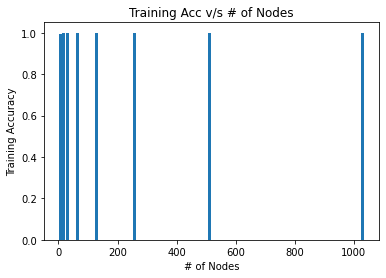

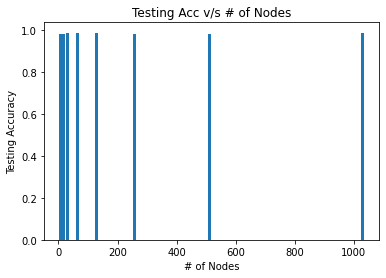

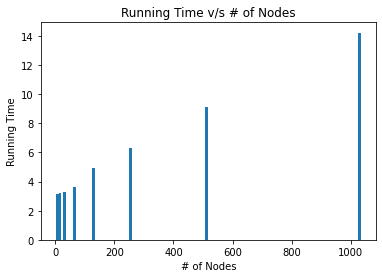

In [ ]:
# Creating the bar plots
# Train graph
plt.bar(nodes, all_train, width = 10) 

plt.xlabel("# of Nodes") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s # of Nodes") 
plt.show() 

# Test graph
plt.bar(nodes, all_test, width = 10 ) 
  
plt.xlabel("# of Nodes") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s # of Nodes") 
plt.show() 

# Time graph
plt.bar(nodes, all_time, width = 10 ) 
  
plt.xlabel("# of Nodes") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s # of Nodes") 
plt.show() 

### Extra Layered Models

In [ ]:
def multi_layer_keras_model(layers, nodes, X_train, y_train):
    model = keras.Sequential()
    
    # Adding layers
    # 2 layers
    if(layers==2):
        print("\n\n\n------------------------------------2 Layered------------------------------------\n\n\n")
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(10, activation='sigmoid'))
    
    # 3 layers
    if(layers==3):
        print("\n\n\n------------------------------------3 Layered------------------------------------\n\n\n")
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(10, activation='sigmoid'))
    
    # 4 layers
    if(layers==4):
        print("\n\n\n------------------------------------4 Layered------------------------------------\n\n\n")
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(10, activation='sigmoid'))
    
    # 5 layers
    if(layers==5):
        print("\n\n\n------------------------------------5 Layered------------------------------------\n\n\n")
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(nodes, activation='relu'))
        model.add(Dense(10, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    # Calculating the time for training the model
    start = time.time()
    model.fit(X_train, y_train, epochs=10, verbose = None, batch_size = 8)
    
    # Sleeping for 1 sec to get 10 sec runtime
    time.sleep(1)

    # End time
    end = time.time()
    
    # Accuracies
    _, train_acc = model.evaluate(X_train, y_train)
    _, test_acc = model.evaluate(X_test,y_test)

    print('Traning Accuracy: %.2f' % (train_acc*100))
    print('Testing Accuracy: %.2f' % (test_acc*100))
    
    # Calculating the total time
    total = end-start
    return train_acc, test_acc, total

In [ ]:
# For automatic training
all_train_multi = []
all_test_multi = []
all_time_multi = []

for i in range(2, 6):
    train_acc, test_acc, total = multi_layer_keras_model(i, 16, X_train, y_train)
    all_train_multi.append(train_acc)
    all_test_multi.append(test_acc)
    all_time_multi.append(total)




------------------------------------2 Layered------------------------------------



12/12 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.9660
Traning Accuracy: 98.77
Testing Accuracy: 96.60



------------------------------------3 Layered------------------------------------



12/12 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9745
Traning Accuracy: 99.15
Testing Accuracy: 97.45



------------------------------------4 Layered------------------------------------



12/12 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9745
Traning Accuracy: 98.96
Testing Accuracy: 97.45



------------------------------------5 Layered------------------------------------



12/12 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.9745
Traning Accuracy: 99.53
Testing Accuracy: 97.45


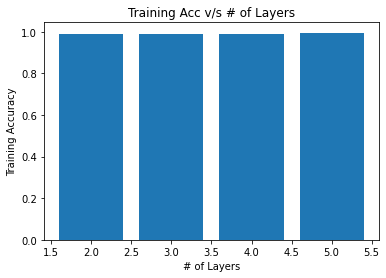

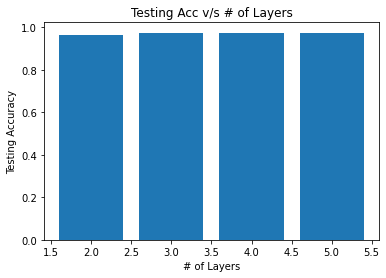

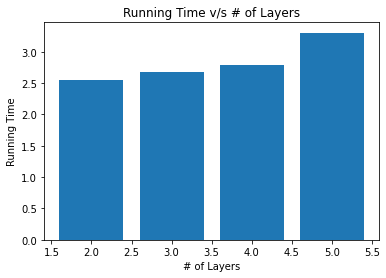

In [ ]:
# Creating the bar plots
# Train graph
layers = [2, 3, 4, 5]
plt.bar(layers, all_train_multi) 

plt.xlabel("# of Layers") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s # of Layers") 
plt.show() 

# Test graph
plt.bar(layers, all_test_multi) 
  
plt.xlabel("# of Layers") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s # of Layers") 
plt.show() 

# Time graph
plt.bar(layers, all_time_multi) 
  
plt.xlabel("# of Layers") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s # of Layers") 
plt.show() 